In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [42]:
# Load the dataset
df = pd.read_excel('EastWestAirlines.xlsx')

# EDA: Display basic information
display(df.info())
display(df.describe())

# Handling missing values
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


None

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [44]:
# Outlier treatment using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [46]:
# Scaling the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, 1:]) 

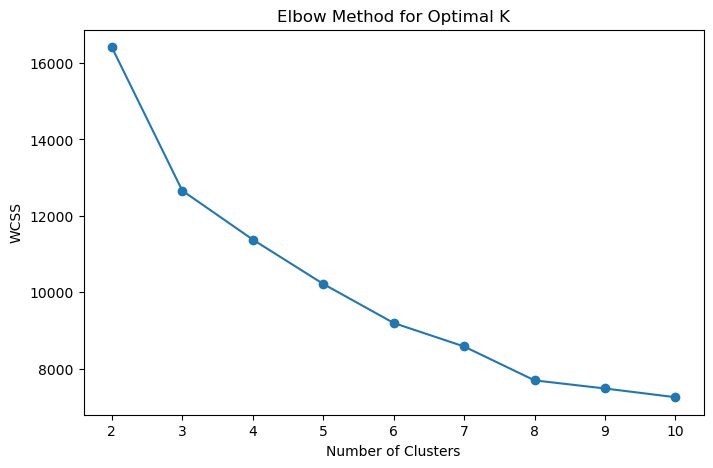

In [48]:
# K-Means Clustering
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Elbow Method Plot
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [50]:
# Implementing K-Means with optimal K=4 (Example)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)
df['KMeans_Cluster'] = kmeans_labels

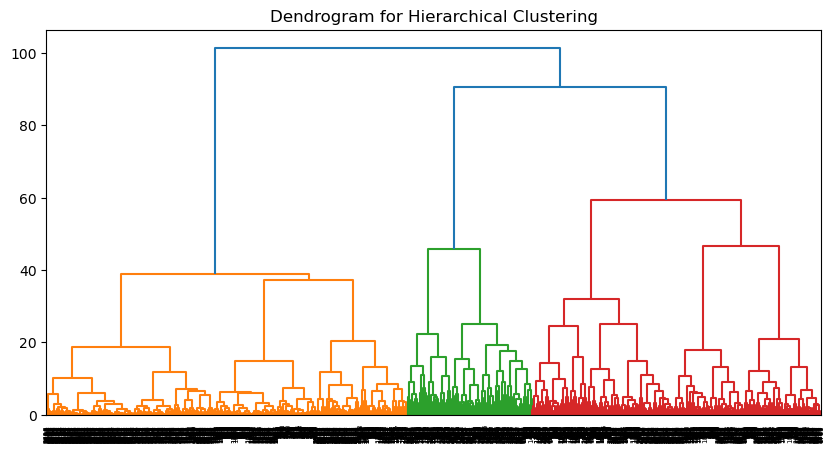

In [52]:
# Hierarchical Clustering
dendro = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(dendro)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

In [ ]:
# Assigning clusters using Hierarchical Clustering
hc_labels = fcluster(dendro, 4, criterion='maxclust')
df['Hierarchical_Cluster'] = hc_labels

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)
df['DBSCAN_Cluster'] = dbscan_labels

In [ ]:
# Evaluation Metrics
silhouette_kmeans = silhouette_score(df_scaled, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(df_scaled, kmeans_labels)
silhouette_dbscan = silhouette_score(df_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else "N/A"
davies_bouldin_dbscan = davies_bouldin_score(df_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else "N/A"

print(f"K-Means Silhouette Score: {silhouette_kmeans}")
print(f"K-Means Davies-Bouldin Score: {davies_bouldin_kmeans}")
print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")
print(f"DBSCAN Davies-Bouldin Score: {davies_bouldin_dbscan}")

In [ ]:
# Scatter plot of clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=kmeans_labels, palette='viridis')
plt.title("K-Means Clustering Visualization")
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=dbscan_labels, palette='coolwarm')
plt.title("DBSCAN Clustering Visualization")
plt.show()
